## Simple Plots

Lets import some Libraries

In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly"

In [3]:
df=pd.read_csv('data/2020-28thJuly_7cities.csv')
df.head(5)

,Date,Country,City,Specie,count,min,max,median,variance
0,30/12/2019,IN,Bengaluru,co,232,1.6,28.6,8.6,228.74
1,31/12/2019,IN,Bengaluru,co,217,0.4,29.7,8.9,287.50
2,01/01/2020,IN,Bengaluru,co,180,1.2,40.2,9.8,246.08
3,02/01/2020,IN,Bengaluru,co,192,0.2,60.3,9.3,570.86
4,03/01/2020,IN,Bengaluru,co,237,0.7,86.4,8.0,523.38


Lets see the Cities and the pollutants

In [4]:
print(df['City'].unique())
print(df['Specie'].unique())

['Bengaluru' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai'
 'Visakhapatnam']
['co' 'dew' 'humidity' 'no2' 'o3' 'pm10' 'pm25' 'pressure' 'so2'
 'temperature']


Focusing on PM 2.5

In [5]:
gas=['pm25']
df1=df[df['Specie'].isin(gas)]
df1=df1.reset_index()

Lets make a simple bar chart

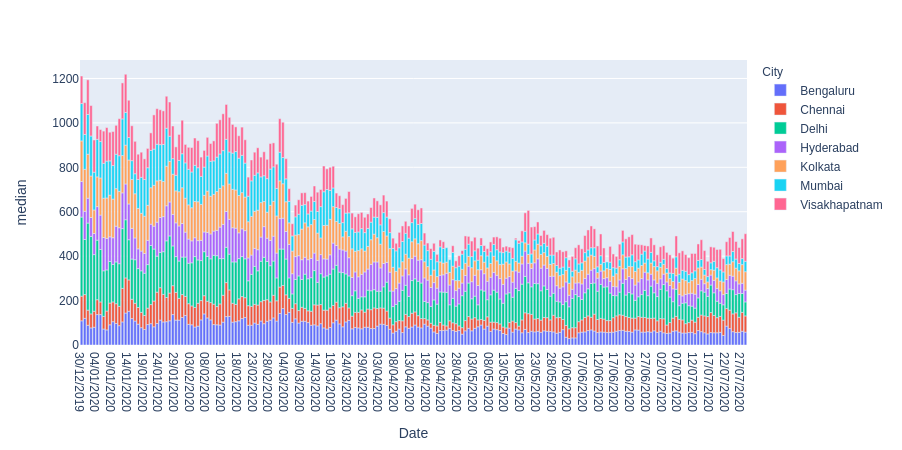

In [7]:
fig=px.bar(df1,'Date','median',color='City')
#fig.update_layout(title="PM 2.5 for Indian cities")
fig.show()
fig.write_image(f'images/pm2.5_barchart.png')

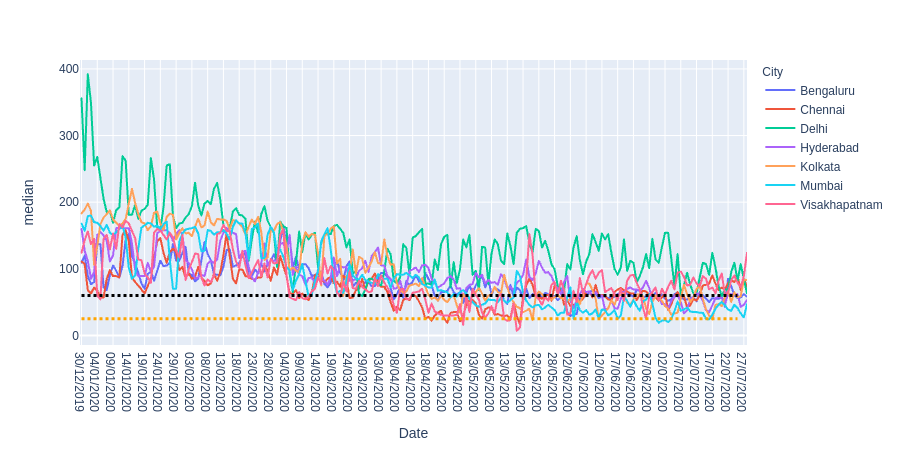

In [8]:
fig=px.line(df1,x='Date',y='median',color='City')
fig.add_shape(type="line",
            x0='30/12/2019',
            y0=25,
            x1='25/07/2020',
            y1=25,
            line=dict(
                color="orange",
                width=3,
                dash="dot",
            ))
fig.add_shape(type="line",
            x0='30/12/2019',
            y0=60,
            x1='25/07/2020',
            y1=60,
            line=dict(
                color="black",
                width=3,
                dash="dot",
            ))
#fig.update_layout(title="PM 2.5 for Indian cities")
fig.show()

Too crowded, right? Lets do it for fewer cities.

In [10]:
city=['Mumbai','Delhi','Kolkata']
dfc=df1[df1['City'].isin(city)]

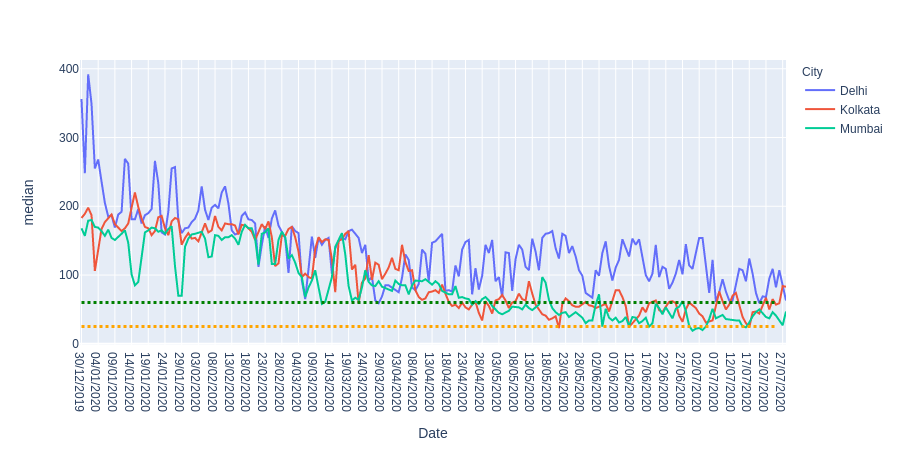

In [11]:
fig=px.line(dfc,x='Date',y='median',color='City')
fig.add_shape(type="line",
            x0='30/12/2019',
            y0=25,
            x1='25/07/2020',
            y1=25,
            line=dict(
                color="orange",
                width=3,
                dash="dot",
            ))
fig.add_shape(type="line",
            x0='30/12/2019',
            y0=60,
            x1='25/07/2020',
            y1=60,
            line=dict(
                color="green",
                width=3,
                dash="dot",
            ))
fig.show()
fig.write_image(f'images/pm2.5_line_chart_3.png')

Lets focus on Mumbai

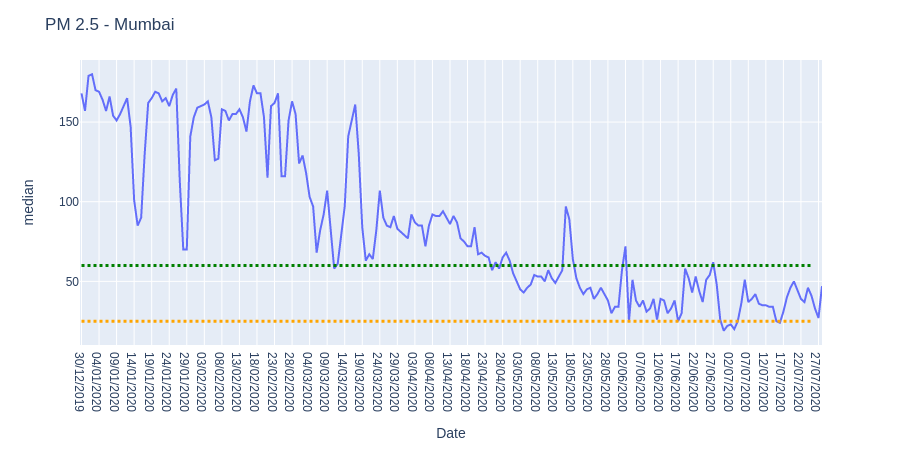

In [13]:
dfc=df1[df1['City'].isin(['Mumbai'])]
fig=px.line(dfc,x='Date',y='median',color='City')
fig.add_shape(type="line",
            x0='30/12/2019',
            y0=25,
            x1='25/07/2020',
            y1=25,
            line=dict(
                color="orange",
                width=3,
                dash="dot",
            ))
fig.add_shape(type="line",
            x0='30/12/2019',
            y0=60,
            x1='25/07/2020',
            y1=60,
            line=dict(
                color="green",
                width=3,
                dash="dot",
            ))
fig.update_layout(title="PM 2.5 - Mumbai",showlegend=False)
fig.show()
fig.write_image(f'images/pm2.5_mumbai.png')

Lets generate PM 2.5 for all cities 

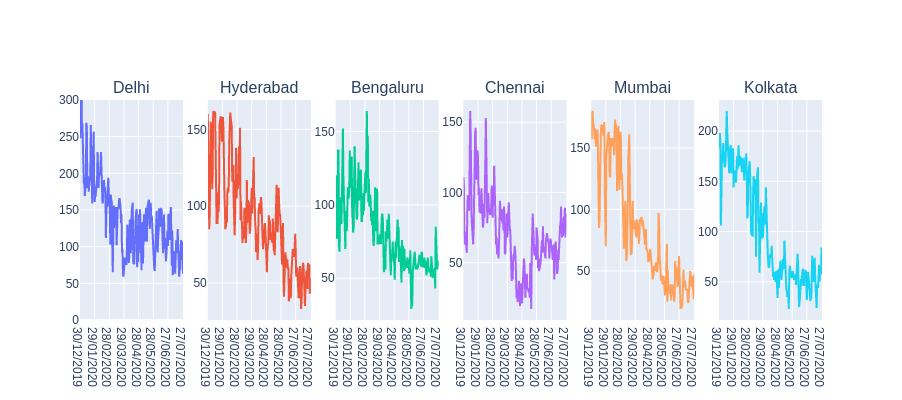

In [14]:
city=['Delhi','Hyderabad','Bengaluru','Chennai','Mumbai','Kolkata']
p=[1,1,1,2,2,2]
h=[1,2,3,1,2,3]
fig = make_subplots(
rows=1, cols=6,
subplot_titles=("Delhi", "Hyderabad", "Bengaluru", "Chennai",'Mumbai','Kolkata'))
for l,i in enumerate(city):
    dff=df1[df1['City'].isin([i])]
    fig.add_trace(go.Scatter(x=dff['Date'], y=dff['median']),row=1, col=l+1)
fig.update_layout(height=400, width=2000,showlegend=False)
fig.update_layout(yaxis=dict(range=[0,300]))
fig.show()
fig.write_image(f'images/pm2.5_all_cities.png')

Plot them all!

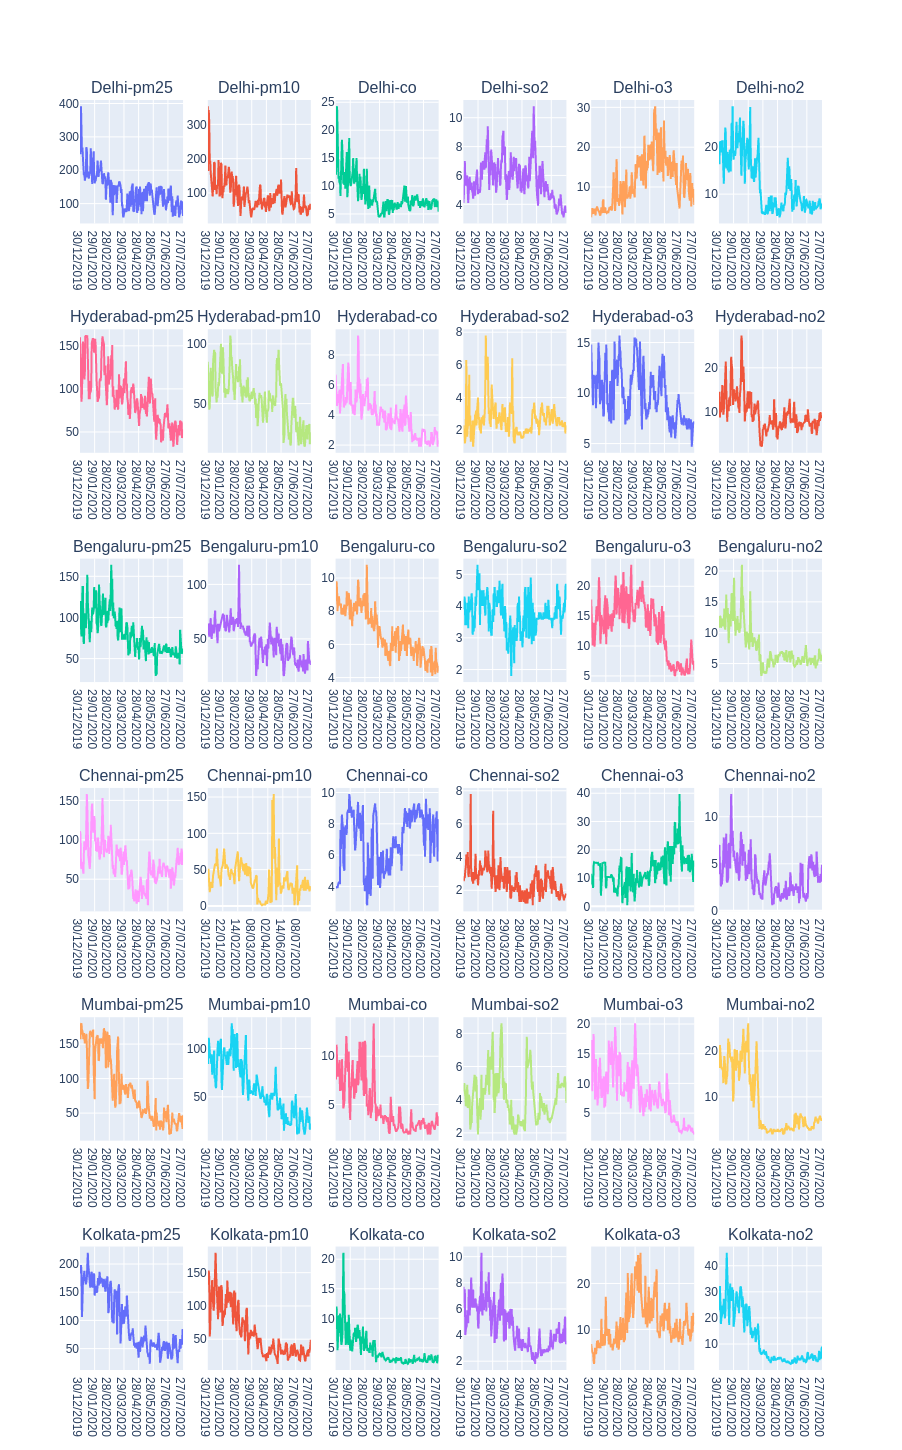

In [15]:
city=['Delhi','Hyderabad','Bengaluru','Chennai','Mumbai','Kolkata']
pollutant=['pm25','pm10','co','so2','o3','no2']
titles=[]
for i in city:
    for j in pollutant:
        entry= i + '-' + j
        titles.append(entry)
fig = make_subplots(
rows=6, cols=6,
subplot_titles=titles)
for m,i in enumerate(city):
    for n,j in enumerate(pollutant):
        dff=df[df['City'].isin([i])]
        dff=dff[dff['Specie'].isin([j])]
        fig.add_trace(go.Scatter(x=dff['Date'], y=dff['median']),row=m+1, col=n+1)
fig.update_layout(height=1450, width=1400,showlegend=False)
fig.show()        
fig.write_image(f'images/all_pollutants.png')